In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import random
import os

#print(os.listdir("pizza_steak/train/pizza"))
# os.listdir("pizza_steak/train/pizza") gibt liste aus Bildern aus 

In [2]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    
    img = mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    
    print(f"Image shape: {img.shape}")
    
    return img
    


['872094.jpg']
Image shape: (512, 512, 3)


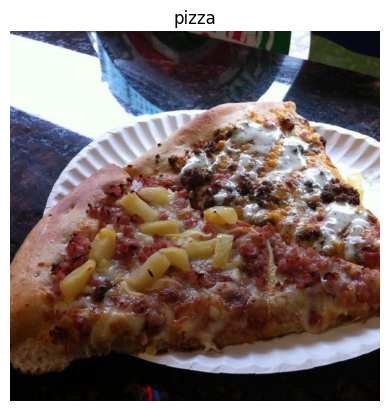

In [3]:
img = view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [4]:
import tensorflow as tf 
#tf.constant(img)

2023-04-09 08:29:16.377545: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-09 08:29:16.379036: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-09 08:29:16.406986: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-09 08:29:16.407515: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-09 08:29:16.865757: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [5]:
# 1. Load our images
# 2. Preprocess our images
# 3. Build a CNN to find patterns 
# 4. Compile our CNN
# 5. Fit the CNN to our training data

##
# padding == "VALID" This is means that the filter windows always stays inside the input image. 

""" 
When padding == ”VALID”, the input image is not padded. 
This means that the filter window always stays inside the input image.  
This type of padding is called valid because for this padding only the valid and original elements of 
the input image are considered. When padding == "VALID", there can be a loss of information. 
Generally, elements on the right and the bottom of the image tend to be ignored. How many elements are ignored 
depends on the size of the kernel and the stride.


SAME: 
column is added on the right with Zero
"""



' \nWhen padding == ”VALID”, the input image is not padded. \nThis means that the filter window always stays inside the input image.  \nThis type of padding is called valid because for this padding only the valid and original elements of \nthe input image are considered. When padding == "VALID", there can be a loss of information. \nGenerally, elements on the right and the bottom of the image tend to be ignored. How many elements are ignored \ndepends on the size of the kernel and the stride.\n\n\nSAME: \ncolumn is added on the right with Zero\n'

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"


train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               batch_size=32, 
                                               target_size=(224,224),
                                               class_mode="binary",
                                              seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

# Build a CNN model(same as the Tiny)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
    
])
    
    
model_1.compile(loss="binary_crossentropy",
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])


history_1 = model_1.fit(train_data,
                        epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


2023-04-09 08:29:17.731271: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-09 08:29:17.731577: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-04-09 08:29:17.898600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Pla

47/47 [==============================] - ETA: 0s - loss: 0.5308 - accuracy: 0.7367

2023-04-09 08:29:26.649807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 10s 200ms/step - loss: 0.5308 - accuracy: 0.7367 - val_loss: 0.3692 - val_accuracy: 0.8540
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4381 - accuracy: 0.7940 - val_loss: 0.4020 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3828 - accuracy: 0.8360 - val_loss: 0.3175 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3464 - accuracy: 0.8653 - val_loss: 0.3813 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.2918 - accuracy: 0.8853 - val_loss: 0.3185 - val_accuracy: 0.8700


In [7]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

<Axes: >

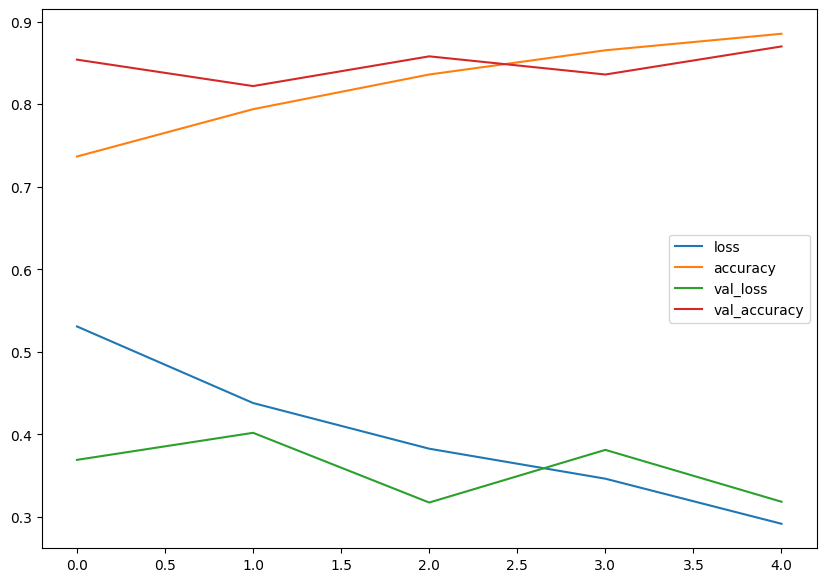

In [8]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10,7))

--2023-04-09 08:30:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Auflösen des Hostnamens raw.githubusercontent.com (raw.githubusercontent.com) … 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Verbindungsaufbau zu raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: 1978213 (1,9M) [image/jpeg]
Wird in ‘03-steak.jpeg.3’ gespeichert.

03-steak.jpeg.3     100%[===================>]   1,89M  3,74MB/s    in 0,5s    

2023-04-09 08:30:04 (3,74 MB/s) - ‘03-steak.jpeg.3’ gespeichert [1978213/1978213]



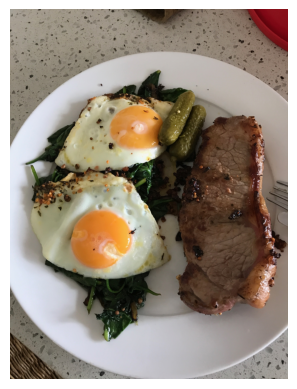

In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);




In [10]:
steak.shape

(4032, 3024, 3)

In [11]:
def load_and_prep_image(filename, img_shape=224):
    
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    img = img/255.
    return img

In [12]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [13]:
steakexpand = tf.expand_dims(steak, axis=0) 
steakexpand

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [15]:
pred = model_1.predict(steakexpand)
pred

1/1 [==============================] - 0s 41ms/step


array([[0.93477774]], dtype=float32)

In [17]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [19]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'